# Access Text Analysis

This grabs the data from [https://github.com/AccessLibCon/text_analysis](https://github.com/AccessLibCon/text_analysis) and does uses Python NLTK to do some analysis

Just click through all of the cells to run the analysis

In [1]:
#Import the libraries that we'll need

import os
import string
import json
import nltk
import glob
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from shutil import unpack_archive

from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# Run a shell script to download all fo the CSV files
os.system('./grab')


0

In [3]:
# Load CSV Files

print("Loading our CSV files into a bunch of dataframes")
df_dict = {}

for f in sorted(os.listdir(os.curdir)):
    if f.endswith('.csv'):
        print("Loading... ",f[:-4])
        df = pd.read_csv(f)
        df_dict[f[:-4]] = df
        

Loading our CSV files into a bunch of dataframes
Loading...  1998
Loading...  1999
Loading...  2000
Loading...  2001
Loading...  2002
Loading...  2003
Loading...  2004
Loading...  2005
Loading...  2006
Loading...  2007
Loading...  2008
Loading...  2009
Loading...  2010
Loading...  2011
Loading...  2012
Loading...  2013
Loading...  2014
Loading...  2015
Loading...  2016
Loading...  2017
Loading...  2018
Loading...  2019


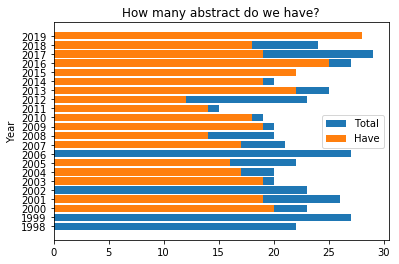

In [33]:

# How many abstracts do we have of all the sessions

year_list = [] 
good_abs_list = [] 
total_abs_list = [] 
percent_list = []

for d in df_dict:
    good_abs = 0
    abs_count = len(df_dict[d].abstract)
    for a in df_dict[d].abstract:
        if type(a) == type("str"):
            good_abs +=1
            
    year_list.append(d)
    good_abs_list.append(good_abs)
    total_abs_list.append(abs_count)
    percent_list.append(good_abs/abs_count)
    
    

plt.barh(year_list, total_abs_list)
plt.barh(year_list,good_abs_list)
plt.ylabel('Year')
plt.title("How many abstract do we have?")
plt.legend(["Total","Have"])
plt.show()

In [48]:

#Binary Sentiment

sid = SentimentIntensityAnalyzer()
summary = {"positive":0,"neutral":0,"negative":0}

pos_abs = []
neutral_abs = []
neg_abs = []

for d in df_dict:
    for a in df_dict[d].abstract:
        if type(a) == type("str"):
            ss = sid.polarity_scores(a)
            if ss["compound"] == 0.0:
                #analysis = analysis.append({"Sent": "NEU", "Text": x},ignore_index=True)
                summary["neutral"] +=1
                neutral_abs.append(a)
            elif ss["compound"] > 0.0:
                #analysis = analysis.append({"Sent": "POS", "Text": x},ignore_index=True)
                summary["positive"] +=1
                pos_abs.append([a,ss["compound"]])
            else:
                #analysis = analysis.append({"Sent": "NEG", "Text": x},ignore_index=True)
                summary["negative"] +=1
                neg_abs.append([a,ss["compound"]])

        
print(summary)


{'positive': 270, 'neutral': 37, 'negative': 31}


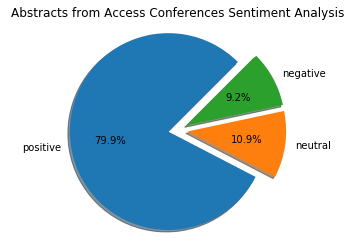

In [41]:

#Plot out that binary info into a nice pie
plt.pie([float(s) for s in summary.values()],labels=[str(l) for l in summary.keys()],autopct='%.1f%%', explode=[.1,.1,.1], shadow=True, startangle=45)
plt.axis('equal')
plt.title("Abstracts from Access Conferences Sentiment Analysis")
plt.show()

What is the most negative abstract?

In [58]:

lowest_score = 0.0
lowest_text = ""

for a in neg_abs:
    if a[1] < lowest_score:
        lowest_score = a[1]
        lowest_text = a[0]
    
print(lowest_text)
print("Score: ",lowest_score)

A perennial favourite at Access. Cliff�s Notes is a survey, from Clifford�s unique perspective, of trends in digital libraries, information policy, and emerging interoperability standards. A miscellany of topics �to keep on your radar screens�.
Kenton Good's summary:
Security - The state of network and web security is really bad. Routers and switches are under attack as well as hardware with embedded processors - not just end computers or servers. How often do you upgrade the firmware on your printers? The pace of problems has really picked up as well. The time window between when problems and patches are announced and when exploits happen is growing ever smaller. The monoculture of desktop computers (microsoft) also creates a lot of problems - there is just not diversity.

Spam - problem at a large scale, not just annoyance. Email is becoming less reliable because of spam filters. This is starting to change the perception that people have of the internet as a communications medium.

D

What is the most positive abstract?

In [59]:
highest_score = 0.0
highest_text = ""

for a in pos_abs:
    if a[1] > highest_score:
        highest_score = a[1]
        highest_text = a[0]
    
print(highest_text)
print("Score: ",highest_score)

If you build it, will they come? In the case of research data repositories, the answer has so far been a solid “maybe.” Discipline-specific repositories with some history, like ICPSR or arXiv, have tended to fare better than university institutional repositories over the past several years. There are many possible explanations for why this may be the case, but in general it seems safe to assume that institutional repository-style deposit is not sufficiently consistent with or salient to researchers’ existing workflows. Thus it must come with some additional incentive – a stable home for “green” open access materials, and/or some additional visibility which allows the work to be more easily cited, and credit received for that citation.

When surveying our faculty for the features they most wanted to see in our new data repository platform, one of the most common responses was “Dropbox.” BC privacy laws currently preclude SFU faculty from making use of cloud services whose servers may be